In [16]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
import numpy as np
from statsmodels.tsa.arima_model import ARIMA

In [3]:
import pandas as pd

In [4]:
my_dataframe=pd.read_csv('C:/Users/Paname/Desktop/bigdataproject/datasets/2015_2022.csv')
my_dataframe.shape

C:\Users\Paname\AppData\Local\Temp\ipykernel_10040\96704560.py:1: DtypeWarning: Columns (0,2,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  my_dataframe=pd.read_csv('C:/Users/Paname/Desktop/bigdataproject/datasets/2015_2022.csv')


(656903, 17)

In [56]:
total_rows = len(my_dataframe)

# List to store the results
null_percentage_results = []

# Loop through the columns of the DataFrame
for column_name in my_dataframe.columns:
    # Calculate the number of null values in the column
    null_count = my_dataframe[column_name].isnull().sum()
    
    # Calculate the percentage of null values
    null_percentage = (null_count / total_rows) * 100
    
    # Append the result to the list
    null_percentage_results.append((column_name, null_percentage))

# Create a new DataFrame from the list of results
null_percentage_df = pd.DataFrame(null_percentage_results, columns=["Column", "Null Percentage"])

# Display the results
print(null_percentage_df)

                 Column  Null Percentage
0       INCIDENT_NUMBER         0.000000
1          OFFENSE_CODE         0.000000
2    OFFENSE_CODE_GROUP        46.224562
3   OFFENSE_DESCRIPTION         0.000000
4              DISTRICT         0.656108
5        REPORTING_AREA         0.000000
6              SHOOTING        53.553944
7      OCCURRED_ON_DATE         0.000000
8                  YEAR         0.000000
9                 MONTH         0.000000
10          DAY_OF_WEEK         0.000000
11                 HOUR         0.000000
12             UCR_PART        46.239329
13               STREET         1.809701
14                  Lat         5.373388
15                 Long         5.373388
16             Location         5.373388


In [7]:
#my_dataframe.isnull().sum()
my_dataframe['HOUR'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

<Axes: >

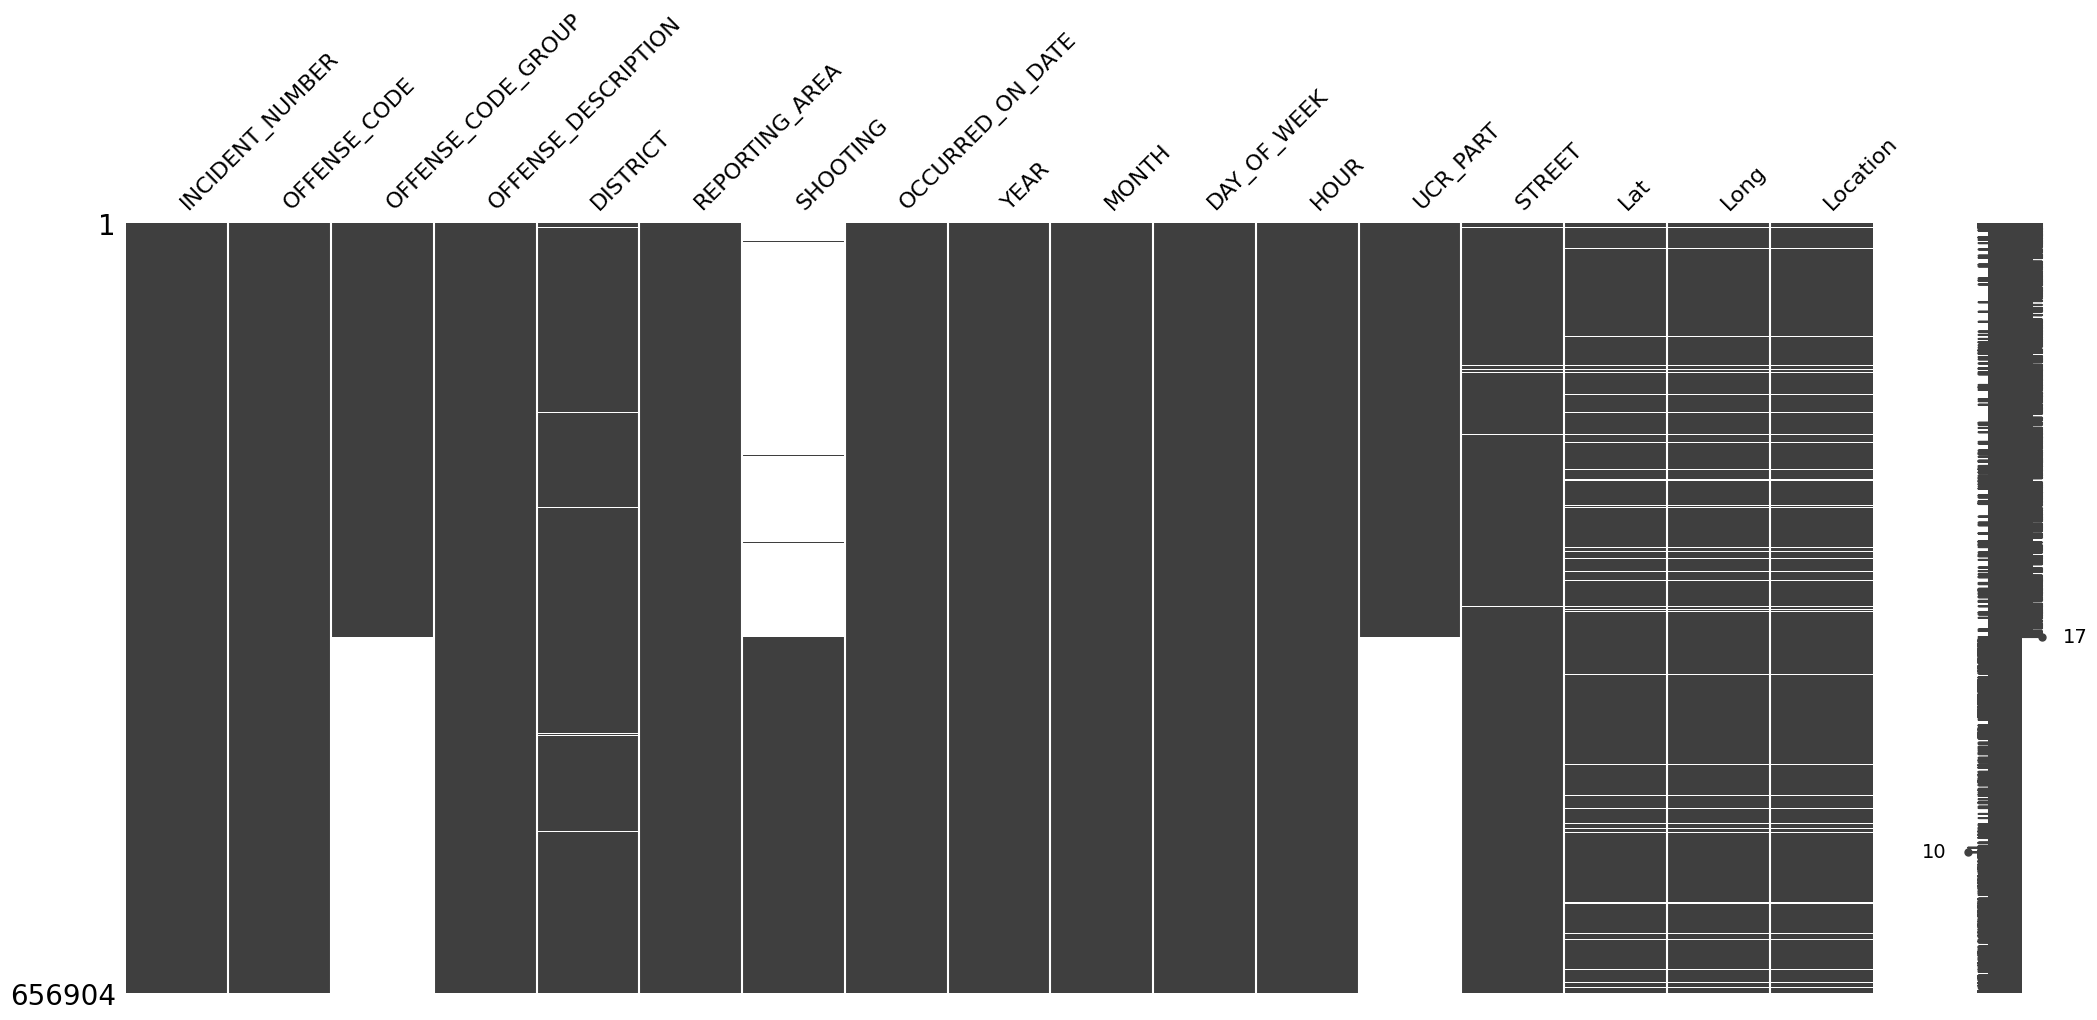

In [5]:
msno.matrix(my_dataframe)

In [4]:

indices_to_delete = my_dataframe[my_dataframe['INCIDENT_NUMBER'] == "202094496"].index

my_dataframe = my_dataframe.drop(indices_to_delete)

my_dataframe['Long'].min()

-71.34946995

In [5]:
my_dataframe.drop(['OFFENSE_DESCRIPTION','INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'REPORTING_AREA', 'SHOOTING', 'OCCURRED_ON_DATE', 'UCR_PART', 'STREET', 'Location','DAY_OF_WEEK'], axis=1, inplace=True)


In [6]:
# Drop rows with null values in both 'DISTRICT' and 'Location'
my_dataframe = my_dataframe.dropna(subset=['DISTRICT','Lat','Long'])

my_dataframe.shape

(618907, 6)

In [72]:
my_dataframe.columns

Index(['DISTRICT', 'YEAR', 'MONTH', 'HOUR', 'Lat', 'Long'], dtype='object')

In [1]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

le_district = LabelEncoder()
my_dataframe['DISTRICT'] = le_district.fit_transform(my_dataframe['DISTRICT'])

X = my_dataframe.drop(['Lat', 'Long'], axis=1)
y = my_dataframe[['Lat', 'Long']]

# Normalize input features using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Reshape input data for LSTM
X_reshaped = X_normalized.reshape(X_normalized.shape[0], 1, X_normalized.shape[1])

# Define K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize variables for Mean Squared Error
mse_values = []

# Loop through K-fold splits
for train_index, test_index in kf.split(X_reshaped):
    X_train, X_test = X_reshaped[train_index], X_reshaped[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Build the model
    model = Sequential()   
   
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Print model summary
    model.summary()

    # Train the model
    history = model.fit(X_train, y_train, epochs=1, batch_size=16, validation_split=0.2)

    # Predicting on the test set
    y_pred = model.predict(X_test)

    # Calculating Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    
    mse_values.append(mse)

# Calculate the mean of MSE values
mean_mse = np.mean(mse_values)

# Print the mean squared error
print("Mean Squared Error (K-fold):", mean_mse)


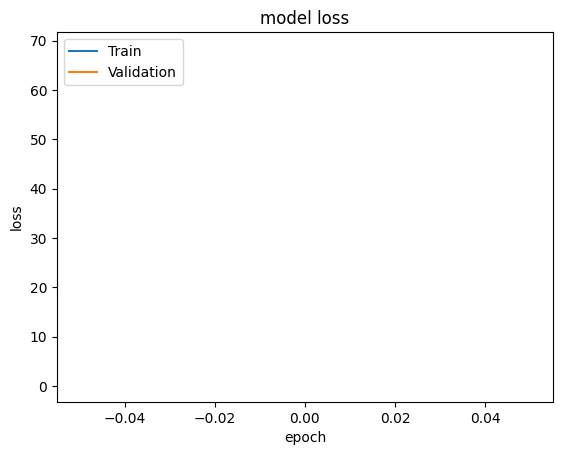

In [9]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [10]:
new_data=pd.read_csv('C:/Users/Paname/Desktop/bigdataproject/datasets/2023_to_ Present.csv')

C:\Users\Paname\AppData\Local\Temp\ipykernel_18576\2201470974.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  new_data=pd.read_csv('C:/Users/Paname/Desktop/bigdataproject/datasets/2023_to_ Present.csv')


In [11]:
new_data.drop(['OFFENSE_DESCRIPTION','INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'REPORTING_AREA', 'SHOOTING', 'OCCURRED_ON_DATE', 'UCR_PART', 'STREET', 'Location','DAY_OF_WEEK'], axis=1, inplace=True)


In [12]:
# Drop rows with null values in both 'DISTRICT' and 'Location'
new_data = new_data.dropna(subset=['DISTRICT','Lat','Long'])

In [13]:
new_data.columns

Index(['DISTRICT', 'YEAR', 'MONTH', 'HOUR', 'Lat', 'Long'], dtype='object')

In [14]:

le_district = LabelEncoder()
new_data['DISTRICT'] = le_district.fit_transform(new_data['DISTRICT'])


X = new_data.drop(['Lat', 'Long'], axis=1)
y = new_data[['Lat', 'Long']]

# Normalize input features using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


new_data_reshaped = X_normalized.reshape(X_normalized.shape[0], 1, X_normalized.shape[1])


predictions = model.predict(new_data_reshaped)


predicted_latitudes = predictions[:, 0]
predicted_longitudes = predictions[:, 1]


print("Predicted Latitudes:", predicted_latitudes)
print("Predicted Longitudes:", predicted_longitudes)


1898/1898 [==============================] - 7s 4ms/step
Predicted Latitudes: [41.933002 41.932915 41.93295  ... 41.932987 41.932545 41.932487]
Predicted Longitudes: [-70.52275  -70.5226   -70.52267  ... -70.52273  -70.52193  -70.521835]


In [82]:

results_df = pd.DataFrame({
    'Expected_Latitude': y['Lat'][:len(predictions)],
    'Expected_Longitude': y['Long'][:len(predictions)],
    'Predicted_Latitude': predictions[:, 0],
    'Predicted_Longitude': predictions[:, 1]
})

results_df.to_csv('predictions_results_final.csv', index=False)
